<h1>Linear Regression (2)</h1>

We assume that you have already gone through the first notebook [found <a href='linear_regression_1.ipynb'>here</a>], and understand the concepts that were addressed there. In this notebook, we will apply linear regression on boston house price dataset [available from sklearn.datasets]:<br/>
1. We will follow the typical ML workflow of initial data analysis and exploratory data analysis to understand the dataset here, followed by modelling and evaluation. Note that, we did not strive for an 'optimised' algorithm for this notebook [e.g., no feature engineering] since this is just an initial work based on some preliminary data analysis. However, we will discuss multiple ways that may achieve a better outcome [results].<br/>
2. We will also touch upon regularisation concept in ML algorithms and will discuss two variants (Lasso and Ridge) of Linear Regression.<br/>
3. Based on our findings, we will also discuss how these results can be utilised/interpreted in real-world [applied use-cases] for different stakeholders.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

<h1>Initial Data Analysis</h1>

In [2]:
boston = load_boston()
print(type(boston))
print(boston.keys())
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print('Dataset shape: ', df.shape)
# check if there is any null record - turns out there is no such record!!!
print('Any nulls?:\n{}'.format(df.isnull().sum()))
# summarised statistics of the dataset
df.describe()

Dataset shape:  (506, 14)
Any nulls?:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h1>Exploratory Data Analysis (EDA)</h1>

In [5]:
# correlation map between features
# if needed for customisation, and also depending on the pandas, the display may vary.
# explanation: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


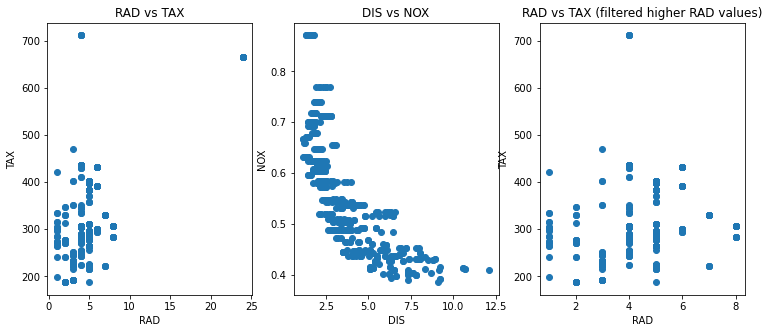

Correlation related to the filtered figure: 0.19, Number of rows: 374


In [6]:
# some figures to check collinearity between features, e.g., NOX and DIS
# there are actually many candidates for multicollinearity.....
_ = plt.figure(figsize=(12.5, 5))
ax1 = plt.subplot(131)
_ = ax1.scatter(df['RAD'], df['TAX'])
_ = ax1.set_title('RAD vs TAX')
_ = ax1.set_xlabel('RAD')
_ = ax1.set_ylabel('TAX')

ax2 = plt.subplot(132)
_ = ax2.scatter(df['DIS'], df['NOX'])
_ = ax2.set_title('DIS vs NOX')
_ = ax2.set_xlabel('DIS')
_ = ax2.set_ylabel('NOX')

ax3 = plt.subplot(133)
_ = ax3.scatter(df[df['RAD']<20]['RAD'], df[df['RAD']<20]['TAX'])
_ = ax3.set_title('RAD vs TAX (filtered higher RAD values)')
_ = ax3.set_xlabel('RAD')
_ = ax3.set_ylabel('TAX')

plt.show()
print('Correlation related to the filtered figure: {:0.2f}, Number of rows: {}'.format(df[df['RAD']<20]['RAD'].corr(df[df['RAD']<20]['TAX']), df[df['RAD']<20].shape[0]))

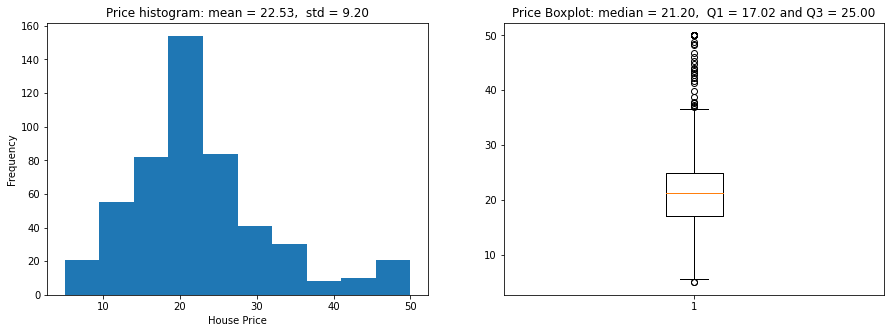

In [7]:
# looking at PRICE [target] distribution and the box plot - almost normal for the sample dataset that we have?
_ = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
_ = ax1.hist(df['PRICE'])
title = "Price histogram: mean = {:0.2f},  std = {:0.2f}".format(df['PRICE'].mean(),df['PRICE'].std())
_ = ax1.set_title(title)
_ = ax1.set_xlabel('House Price')
_ = ax1.set_ylabel('Frequency')

ax2 = plt.subplot(122)
_ = ax2.boxplot(df['PRICE'])
title = "Price Boxplot: median = {:0.2f},  Q1 = {:0.2f} and Q3 = {:0.2f}".format(df['PRICE'].median(),df['PRICE'].quantile(.25),df['PRICE'].quantile(.75) )
_ = ax2.set_title(title)

<h1>Tasks</h1>

1. From the <a href='linear_regression_1.ipynb'>previous notebook's</a> understanding, what do you feel about the assumptions on data for applying Linear Regression for this dataset? Note that, some aspects are checked only - for more complete investigation, what you could do?<br/>
2. There are multiple features for this dataset. Also, from the analysis, it seems multicollinearity could be a factor? What can be done to check on this further and/or even rectify this?

<h1>Modelling</h1>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# dropping the PRICE column [target variable]
X = df.drop(['PRICE'], axis = 1)
#X = df[['RM']] # use/uncomment this line if you want to use a single feature!!!
y = df['PRICE']
# standardisation of the features: extremely important so that the effect of 'magnitude difference' between features do not affect the optimisation of weights are not given more importance
sc = StandardScaler()
X = sc.fit_transform(X)

# separating of training and testing set: 80-20 separation
# random_state parameter is given to keep the same randomised splitting: important when you are creating the model
# and want to keep a specific separation across multiple runs. Once modelling/evaluation is completed, you can actually
# remove this parameter to generate random splitting in each run of this notebook
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# the next part is just used to display the weights we have obtained for LinearRegression for features and the intercept
arr = (list(df.columns) + ['INTERCEPT'])
arr.remove('PRICE')
w_coef = np.append(lr.coef_, lr.intercept_)

df_weights = pd.DataFrame(data = [list(w_coef)], columns=arr)
df_weights.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,INTERCEPT
0,-0.971494,0.701556,0.276752,0.706532,-1.99143,3.115718,-0.17706,-3.045771,2.282785,-1.792605,-1.979954,1.126499,-3.628149,22.485268


<h1>Evaluation</h1>

In [9]:
# model evaluation for training set
y_train_predict = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_train_predict)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print("Training SET")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# two dimensional dictionary: to store the results
eval = {}
eval['training']  = {}
eval['training']['lr'] = [mae, rmse, r2]

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("\nTesting SET")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

eval['testing']  = {}
eval['testing']['lr'] = [mae, rmse, r2]

Training SET
--------------------------------------
MAE is 3.31477162678323
RMSE is 4.6520331848801675
R2 score is 0.7508856358979672

Testing SET
--------------------------------------
MAE is 3.1890919658878487
RMSE is 4.928602182665336
R2 score is 0.6687594935356321


In [10]:
# Run this cell when using only one feature = RM (room)
#_ = plt.figure(figsize=(10,5))
#ax1 = plt.subplot(111)
#_ = ax1.scatter(X, y)
#prediction_space = np.linspace(min(X), max(X)).reshape(-1,1) 
#_ = ax1.plot(prediction_space, lr.predict(prediction_space), color = 'black', linewidth = 3)
#_ = ax1.set_ylabel('value of house/1000($)')
#_ = ax1.set_xlabel('number of rooms')

#plt.show()

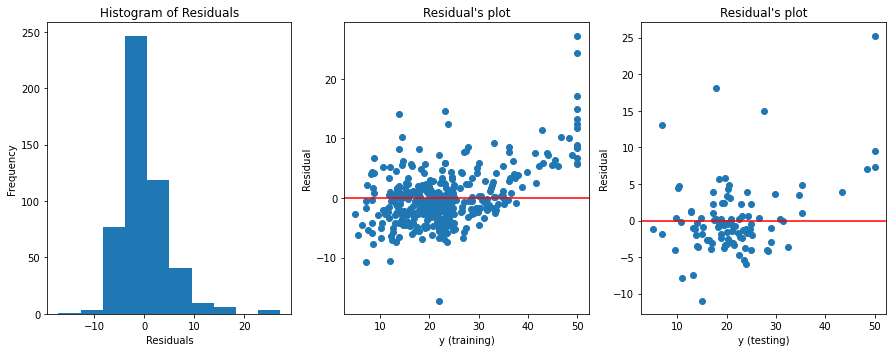

In [11]:
_ = plt.figure(figsize=(12.5,5))

y_predict = np.concatenate((y_train_predict, y_test_predict))

ax1 = plt.subplot(131)
_ = ax1.hist(np.concatenate((y_train, y_test)) - y_predict)
_ = ax1.set_title('Histogram of Residuals')
_ = ax1.set_xlabel('Residuals')
_ = ax1.set_ylabel('Frequency')

ax2 = plt.subplot(132)
_ = ax2.scatter(y_train, y_train - y_train_predict)
_ = ax2.axhline(y=0, color='r', linestyle='-')
_ = ax2.set_title("Residual's plot")
_ = ax2.set_xlabel('y (training)')
_ = ax2.set_ylabel('Residual')

ax3 = plt.subplot(133)
_ = ax3.scatter(y_test, y_test - y_test_predict)
_ = ax3.axhline(y=0, color='r', linestyle='-')
_ = ax3.set_title("Residual's plot")
_ = ax3.set_xlabel('y (testing)')
_ = ax3.set_ylabel('Residual')

plt.tight_layout()
plt.show()

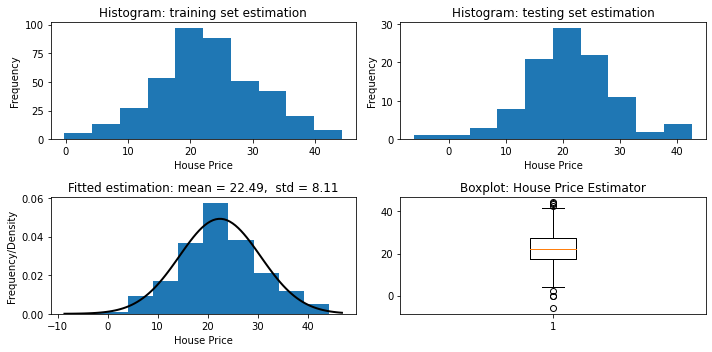

In [12]:
from scipy.stats import norm

_ = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(221)
_ = ax1.hist(y_train_predict)
_ = ax1.set_title('Histogram: training set estimation')
_ = ax1.set_xlabel('House Price')
_ = ax1.set_ylabel('Frequency')

ax2 = plt.subplot(222)
_ = ax2.hist(y_test_predict)
_ = ax2.set_title('Histogram: testing set estimation')
_ = ax2.set_xlabel('House Price')
_ = ax2.set_ylabel('Frequency')

y_predict = np.concatenate((y_train_predict, y_test_predict))

ax3 = plt.subplot(223)
_ = ax3.hist(y_predict, density=True)
# plot the probability denstiry function (p.d.f).
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, y_predict.mean(),y_predict.std())
_ = ax3.plot(x, p, 'k', linewidth=2)
title = "Fitted estimation: mean = {:0.2f},  std = {:0.2f}".format(y_predict.mean(),y_predict.std())
_ = ax3.set_title(title)
_ = ax3.set_xlabel('House Price')
_ = ax3.set_ylabel('Frequency/Density')

ax4 = plt.subplot(224)
_ = ax4.boxplot(y_predict)
_ = ax4.set_title('Boxplot: House Price Estimator')

plt.tight_layout()
plt.show()

<h1>Conclusions</h1>
???<br/>
Based on the findings [estimator's normal approximation], some real-world use-cases can be discussed quite intuitively [inside the slides].

<h1>Regularisation [Lasso and Ridge]</h1>
In this part, we will briefly utilise both lasso and ridge regularsation features. We will then compare the results with the above Linear Regression result and discuss some insights.

In [13]:
from sklearn.linear_model import Ridge, Lasso

# alpha is the regularisation strength [same as lambda in slide]
rg = Ridge(alpha=0.5)
rg.fit(X_train, y_train)

# add the ridge coefficients to the already created weight matrix
w_coef = np.append(rg.coef_, rg.intercept_)
df_weights.loc[1] = w_coef

ls = Lasso(alpha=0.3)
ls.fit(X_train, y_train)

# add the lasso coefficients to the already created weight matrix
w_coef = np.append(ls.coef_, ls.intercept_)
df_weights.loc[2] = w_coef

df_weights.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,INTERCEPT
0,-0.971494,0.701556,0.276752,0.706532,-1.991430,3.115718,-0.17706,-3.045771,2.282785,-1.792605,-1.979954,1.126499,-3.628149,22.485268
1,-0.966698,0.691904,0.263492,0.708471,-1.976374,3.119098,-0.17778,-3.027764,2.241619,-1.754429,-1.975349,1.125317,-3.621425,22.485058
2,-0.432017,0.000000,-0.000000,0.550127,-0.651164,3.324165,-0.00000,-1.157092,0.000000,-0.000000,-1.604639,0.897827,-3.584193,22.463686


In [14]:
# RIDGE
# model evaluation for training set
y_train_predict = rg.predict(X_train)
mae = mean_absolute_error(y_train, y_train_predict)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)
eval['training']['rg'] = [mae, rmse, r2]

# model evaluation for testing set
y_test_predict = rg.predict(X_test)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)
eval['testing']['rg'] = [mae, rmse, r2]

# LASSO
# model evaluation for training set
y_train_predict = ls.predict(X_train)
mae = mean_absolute_error(y_train, y_train_predict)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)
eval['training']['ls'] = [mae, rmse, r2]

# model evaluation for testing set
y_test_predict = ls.predict(X_test)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)
eval['testing']['ls'] = [mae, rmse, r2]


In [15]:
print('Training Set\n*************')
print('MAE\n*****\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['training']['lr'][0], eval['training']['rg'][0], eval['training']['ls'][0]))
print('\nRMSE\n*****\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['training']['lr'][1], eval['training']['rg'][1], eval['training']['ls'][1]))
print('\nR2 Score\n********\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['training']['lr'][2], eval['training']['rg'][2], eval['training']['ls'][2]))

print('\n\nTesting Set\n*************')
print('MAE\n*****\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['testing']['lr'][0], eval['testing']['rg'][0], eval['testing']['ls'][0]))
print('\nRMSE\n*****\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['testing']['lr'][1], eval['testing']['rg'][1], eval['testing']['ls'][1]))
print('\nR2 Score\n********\nLR: {}\nRidge: {}\nLasso: {}'.format(eval['testing']['lr'][2], eval['testing']['rg'][2], eval['testing']['ls'][2]))

Training Set
*************
MAE
*****
LR: 3.31477162678323
Ridge: 3.311700444019527
Lasso: 3.3455412315414312

RMSE
*****
LR: 4.6520331848801675
Ridge: 4.652070572734856
Lasso: 4.8488991792260965

R2 Score
********
LR: 0.7508856358979672
Ridge: 0.7508816316749951
Lasso: 0.7293553353163338


Testing Set
*************
MAE
*****
LR: 3.1890919658878487
Ridge: 3.1873303050121398
Lasso: 3.262524294257838

RMSE
*****
LR: 4.928602182665336
Ridge: 4.929790607688343
Lasso: 5.184047244098899

R2 Score
********
LR: 0.6687594935356321
Ridge: 0.6685997314154497
Lasso: 0.6335338956903878


<h1>Reflection</h1>

1. Notice that the regularisation did not improve the performance much but utilising it may still give better generlisation performance overall (especially for unseen data) by removing target's [PRICE] dependency on certain features heavily.<br/>
2. We also did not select the regularisation strength parameter (alpha) properly (arbitrary here). A better approach would be use GridSearchCV using different parameters and select the best one. GridSearchCV is demonstrated in a different context in the next notebook - <a href='logistic_regression.ipynb'>here</a>.<br/>
3. For Lasso, note that some of the weights are 0 - feature selection? Relate this to EDA [which features are not selected]. Any insights?